#### The dataset: the data released during the Big Data Challenge organized by Telecom Italia Mobile (TIM) in 2016.

##### It originally contains data on 2.107.755 companies on seven Italian metropolitan areas: Milan, Turin, Venice, Rome,Naples, Bari, and Palermo. In particular, for every company is given the exact 

- location in latitude and longitude, 
- the metropolitan area itself, 
- the size of the company in terms of employees,
- the age, 
- the ateco code which indicates the economic sector in which the corresponding company operates in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [2]:
data = pd.read_csv('data/manufacturing_companies_high_intraindex.csv')

In [3]:
data.head()

,ids,lon,lat,kind,location,name,ateco,size,age,intrasector
0,86211,16.872418,41.122014,U,Bari,GOLDEN LADY COMPANY SOCIETA PER AZIONI,14,grande,over20y,0.93
1,510137,16.928100,40.819400,S,Bari,VEBAD S.P.A.,23,media,over20y,0.91
2,554260,16.521270,40.823185,U,Bari,NATUZZI S.P.A.,31,grande,over20y,0.89
3,96001,16.779423,41.088815,U,Bari,LUIGI LAVAZZA - SOCIETA PER AZIONI ABBREVIABI...,10,grande,over20y,0.86
4,51805,16.870448,41.122855,U,Bari,MARINA RINALDI S.R.L.,14,grande,over20y,0.93


In [4]:
data.shape

(10305, 10)

In [5]:
# companies per location (metropolitan area)
data['location'].value_counts()

Milano     4699
Torino     1629
Venezia    1384
Roma       1224
Napoli      800
Bari        412
Palermo     157
Name: location, dtype: int64

### Visualising Locations

In [6]:
bari = data[data['location'] == 'Bari']

In [7]:
air = folium.Map(location = [41.0368, 16.102], zoom_start=10)

for index, row in bari.iterrows(): 
    lat = row['lat']
    lon = row['lon']
    name = row['name']
    folium.Marker([lat, lon], popup='<i> '+str(name)+'</i>', icon = folium.Icon(color='green')).add_to(air)
    
display(air)

### Companies per ateco code

In [8]:
cp_ateco = data['ateco'].value_counts(normalize = True).sort_values()

In [9]:
np_arr = cp_ateco.values

C:\Users\alket\anaconda3\envs\ds10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


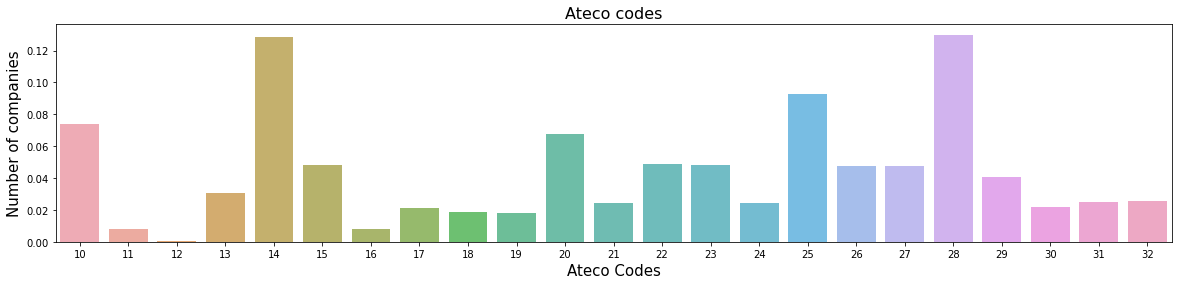

In [10]:
plt.figure(figsize = (20, 4))
sns.barplot(cp_ateco.index, cp_ateco.values, alpha=0.8)
plt.title("Ateco codes", fontsize=16)
plt.ylabel('Number of companies', fontsize=15)
plt.xlabel('Ateco Codes', fontsize=15)
plt.show()

### Companies per age and size 

In [11]:
cp_age = data['age'].value_counts(normalize = True).sort_values()

In [12]:
cp_size = data['size'].value_counts(normalize = True).sort_values()

C:\Users\alket\anaconda3\envs\ds10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


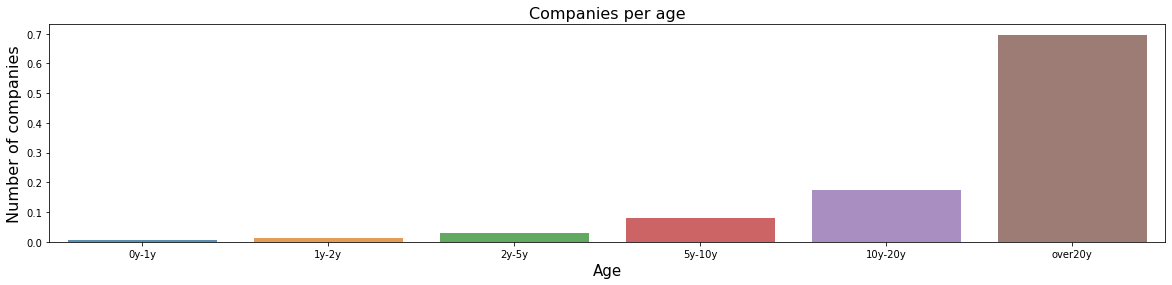

In [13]:
plt.figure(figsize = (20, 4))
sns.barplot(cp_age.index, cp_age.values, alpha=0.8)
plt.title("Companies per age", fontsize=16)
plt.ylabel('Number of companies', fontsize=16)
plt.xlabel('Age', fontsize=15)
plt.show()

C:\Users\alket\anaconda3\envs\ds10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


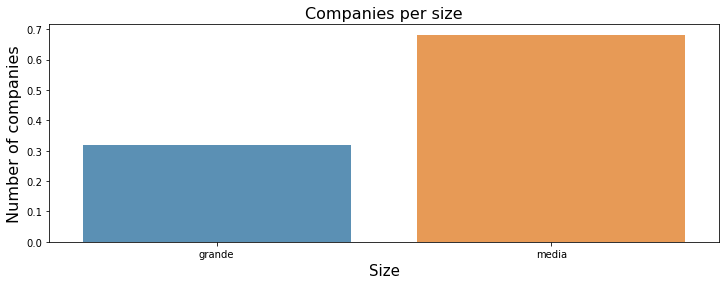

In [14]:
plt.figure(figsize = (12, 4))
sns.barplot(cp_size.index, cp_size.values, alpha=0.8)
plt.title("Companies per size", fontsize=16)
plt.ylabel('Number of companies', fontsize=16)
plt.xlabel('Size', fontsize=15)
plt.show()

In [8]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

In [22]:
data = pd.DataFrame({'Alket': [ 1,  2,  3,  4, 12,  1,  6,  7],
                     'Alan':  [ 2,  1,  6,  7, 12,  1,  2,  0], 
                     'Albert':[12,  1, 11, 10, 23, 14, 12, 10]})

In [23]:
data = data.transpose()

In [24]:
data.columns = ['game1', 'game2', 'game3', 'game4', 'game5', 'game6', 'game7', 'game8']

In [25]:
data

,game1,game2,game3,game4,game5,game6,game7,game8
Alket,1,2,3,4,12,1,6,7
Alan,2,1,6,7,12,1,2,0
Albert,12,1,11,10,23,14,12,10


In [26]:
jaccard_distances = pdist(data.values, metric='jaccard')
print(jaccard_distances)

[0.75  1.    0.875]


In [27]:
square_jaccard_distances = squareform(jaccard_distances)
print(square_jaccard_distances)

[[0.    0.75  1.   ]
 [0.75  0.    0.875]
 [1.    0.875 0.   ]]
